<font size="5"><b><center>TOPIC MODELLING</center></b></font>
<font size="2"><b><center>ASSIGNMENGT</center></b></font>

<font size="3"><b>CUSTOMER SUPPORT ON TWITTER DATASET OVERVIEW</b></font>

The dataset provided contains information about Twitter conversations between users and companies, primarily focusing on customer support interactions. Below is a breakdown of the different columns in the dataset:

## Columns:

1. **tweet_id**: A unique, anonymized identifier for each tweet in the dataset. It is referenced by other tweets, particularly response tweets.

2. **author_id**: An anonymized user ID uniquely identifying the users who authored the tweets. For companies providing customer support, their user IDs are likely included here.

3. **inbound**: A binary indicator specifying whether the tweet is inbound to a company providing customer support on Twitter.

4. **created_at**: Date and time when each tweet was sent, providing temporal context to the dataset.

5. **text**: The content of the tweet, including user inquiries, complaints, or feedback.

6. **response_tweet_id**: IDs of tweets that are responses to the tweet in the current row, facilitating the tracking of conversational flow.

7. **in_response_to_tweet_id**: ID of the tweet to which the current tweet is responding, helping in reconstructing conversation threads and understanding context.

This dataset offers valuable insights into customer-company interactions on Twitter, aiding in the analysis of user queries, company responses, and overall dynamics of these interactions.

<font size="3"><b>LOADING A DATA SET</b></font>

In [59]:
# Loading data set using pandas.
import pandas as pd

file= file= "C:/Users/aleky/Desktop/TextBasedAnalysis/Customer Support on Twitter.csv"
df = pd.read_csv(file)
df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0
5,119243,VirginTrains,False,Tue Oct 10 15:25:14 +0000 2017,"@105836 Have you tried from another device, Mi...",119244,119241.0
6,119244,105836,True,Tue Oct 10 15:26:44 +0000 2017,"@VirginTrains yep, I've tried laptop too sever...",119245,119243.0
7,119245,VirginTrains,False,Tue Oct 10 15:33:22 +0000 2017,"@105836 It's working OK from here, Miriam. Doe...",NaN,119244.0
8,119242,105836,True,Tue Oct 10 15:09:00 +0000 2017,@VirginTrains I still haven't heard &amp; the ...,119240,119246.0
9,119246,VirginTrains,False,Tue Oct 10 10:13:19 +0000 2017,@105836 That's what we're here for Miriam 😊 T...,119242,119247.0


<font size="3"><b>PRINTING COUPLE OF TEXTS</b></font>

In [67]:
print(repr(df.iloc[46]["text"][0:400]))
print(repr(df.iloc[50]["text"][0:400]))

"@SpotifyCares It's on a Macbook Air (early 2014), running High Sierra, spotify version 1.0.65.320.gac7a8e02"
'@AppleSupport Latest version 😡😡 I have read the help page turned off virtually all apps and location svs too - but in typing this I dropped 3% life'


<font size="3"><b>SPLITING INTO SENTENCES</b></font>

In [68]:
import pandas as pd
import re

# Function to split text into paragraphs and count them
def count_paragraphs(text):
    paragraphs = re.split(r'\.\s*\n', text)
    return len(paragraphs)

# Applying the function to each row
df["number_of_paragraphs"] = df["text"].apply(count_paragraphs)
print(df)

    tweet_id     author_id  inbound                      created_at  \
0     119237        105834     True  Wed Oct 11 06:55:44 +0000 2017   
1     119238  ChaseSupport    False  Wed Oct 11 13:25:49 +0000 2017   
2     119239        105835     True  Wed Oct 11 13:00:09 +0000 2017   
3     119240  VirginTrains    False  Tue Oct 10 15:16:08 +0000 2017   
4     119241        105836     True  Tue Oct 10 15:17:21 +0000 2017   
..       ...           ...      ...                             ...   
88    119330        105859     True  Wed Oct 11 13:50:42 +0000 2017   
89    119331        105860     True  Wed Oct 11 13:47:14 +0000 2017   
90    119332         Tesco    False  Wed Oct 11 13:34:06 +0000 2017   
91    119333        105861     True  Wed Oct 11 14:05:18 +0000 2017   
92    119335         Tesco    False  Wed Oct 11 15:38:07 +0000 2017   

                                                 text response_tweet_id  \
0   @AppleSupport causing the reply to be disregar...            119236 

<font size="3"><b>START BY GETTING TFIDF</b></font>

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as stopwords

tfidf_text_vectorizer = TfidfVectorizer(stop_words='english', min_df=5, max_df=0.7)
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['text'])
tfidf_text_vectors.shape


(93, 30)

<font size="3"><b>MAKING DATAFRAME OF SENTENCES</b></font>

In [73]:
file= "C:/Users/aleky/Desktop/TextBasedAnalysis/Customer Support on Twitter.csv"
df = pd.read_csv(file)
df = pd.DataFrame(df)

# flatten the paragraphs keeping the years
df["paragraphs"] = df["text"].map(lambda text: re.split(r'\.\s*\n', text))

# Flatten the paragraphs keeping the years
paragraph_df = pd.DataFrame([{ "text": paragraph, "tweet_id": year } 
                              for paragraphs, year in zip(df["paragraphs"], df["tweet_id"]) 
                              for paragraph in paragraphs if paragraph])

paragraph_df.head(10)


,text,tweet_id
0,@AppleSupport causing the reply to be disregar...,119237
1,@105835 Your business means a lot to us. Pleas...,119238
2,@76328 I really hope you all change but I'm su...,119239
3,@105836 LiveChat is online at the moment - htt...,119240
4,@VirginTrains see attached error message. I've...,119241
5,"@105836 Have you tried from another device, Mi...",119243
6,"@VirginTrains yep, I've tried laptop too sever...",119244
7,"@105836 It's working OK from here, Miriam. Doe...",119245
8,@VirginTrains I still haven't heard &amp; the ...,119242
9,@105836 That's what we're here for Miriam 😊 T...,119246


<font size="3"><b>GETTING THE TFIDF OF THE SENTENCES OF DATA FRAME</b></font>

In [75]:
file= "C:/Users/aleky/Desktop/TextBasedAnalysis/Customer Support on Twitter.csv"
df = pd.read_csv(file)
df = pd.DataFrame(df)

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
import warnings

# Suppressing warnings for demonstration purposes
warnings.filterwarnings("ignore")

# Assuming you have already loaded paragraph_df from your previous operations

# Convert spaCy stop words to a list
stopwords_list = list(stopwords)

# Initialize TfidfVectorizer
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform text data
tfidf_para_vectors = tfidf_para_vectorizer.fit_transform(paragraph_df["text"])

# Get the shape of TF-IDF vectors
print(tfidf_para_vectors.shape)


(96, 29)


<font size="3"><b>TOPIC MODELLING</b></font>

<font size="3"><b>NMF</b></font>

In [76]:
from sklearn.decomposition import NMF
nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

<font size="3"><b>LETS LOOK AT OUT 10 TOPICS:</b></font>

In [77]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined nmf_text_model and tfidf_text_vectorizer
feature_names = tfidf_text_vectorizer.get_feature_names_out()
display_topics(nmf_text_model, feature_names)



Topic 00
 https (76.52)
 amp (3.43)
 using (3.41)
 help (2.80)
 does (2.59)

Topic 01
 applesupport (46.98)
 help (14.80)
 ios (12.09)
 version (10.41)
 apps (10.40)

Topic 02
 tesco (83.28)
 using (5.13)
 does (4.84)
 look (4.53)
 ve (2.10)

Topic 03
 thanks (37.01)
 device (15.89)
 does (10.58)
 ay (10.02)
 version (8.22)

Topic 04
 spotifycares (33.54)
 ve (31.91)
 tried (12.62)
 using (6.03)
 know (4.91)

Topic 05
 hi (56.76)
 using (12.44)
 amp (7.63)
 device (5.39)
 ll (4.73)

Topic 06
 76099 (31.26)
 phone (28.41)
 update (22.29)
 apps (4.12)
 does (3.36)

Topic 07
 sorry (93.42)
 dm (5.89)
 just (0.54)
 https (0.10)
 device (0.05)

Topic 08
 dm (24.95)
 gdrqu22ypt (14.93)
 help (12.37)
 send (11.55)
 look (9.40)

Topic 09
 just (63.87)
 help (7.32)
 know (6.40)
 let (5.51)
 ay (4.41)


<font size="3"><b>RUNING SAME MODEL</b></font>

In [78]:
from sklearn.decomposition import NMF

# Assuming tfidf_para_vectors and tfidf_para_vectorizer are already defined
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())



Topic 00
 co (41.19)
 https (41.19)
 gdrqu22ypt (4.49)
 dm (4.03)
 help (3.07)

Topic 01
 applesupport (42.66)
 help (16.42)
 ios (10.77)
 apps (9.70)
 version (9.46)

Topic 02
 tesco (91.73)
 look (6.87)
 ve (1.11)
 co (0.09)
 https (0.09)

Topic 03
 thanks (39.69)
 spotifycares (33.31)
 version (16.30)
 device (4.49)
 ay (2.44)

Topic 04
 ve (61.40)
 tried (22.09)
 spotifycares (12.58)
 happy (1.89)
 ios (1.58)

Topic 05
 hi (77.67)
 amp (7.77)
 device (5.30)
 thanks (2.78)
 happy (2.71)

Topic 06
 76099 (29.16)
 phone (28.59)
 update (23.47)
 battery (5.74)
 apps (5.15)

Topic 07
 sorry (95.21)
 dm (4.76)
 device (0.03)
 version (0.00)
 https (0.00)

Topic 08
 let (18.21)
 know (17.76)
 ay (16.08)
 device (14.55)
 help (11.13)

Topic 09
 dm (24.87)
 send (14.68)
 look (14.07)
 gdrqu22ypt (13.64)
 happy (11.61)


<font size="3"><b>LETS SEE HOW BIG IS EACH TOPIC</b></font>

In [79]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([10.74553887,  8.30421382,  9.56928338,  9.51922356,  7.24482531,
       11.03899049,  6.98020252,  7.4452272 , 17.7595527 , 11.39294214])

<font size="3"><b>TOPIC SIZES</b></font>

In [80]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([13.2291196 ,  8.05860362,  8.329566  ,  8.00438181,  7.48103086,
       10.31176542, 10.33116281,  6.9198921 , 12.92555298, 14.40892479])

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


(96, 29)

<font size="3"><b>LATENT DIRICHLET ALLOCATION</b></font>

<font size="2"><b>START BY CUTTING THE PARAGRAPHS INTO WORDS</b></font>

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert the set of stop words to a list
stopwords_list = list(stopwords)

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)
count_para_vectors = count_para_vectorizer.fit_transform(paragraph_df["text"])
count_para_vectors.shape


(96, 29)

<font size="3"><b>RUN THE LDA</b></font>

In [83]:
from sklearn.decomposition import LatentDirichletAllocation
lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [84]:
def display_lda_topics(model, feature_names, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1]
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (feature_names[largest[i]], abs(words[largest[i]] * 100.0 / total)))

# Assuming you have already defined lda_para_model and count_para_vectorizer
feature_names_lda = count_para_vectorizer.get_feature_names_out()
display_lda_topics(lda_para_model, feature_names_lda)



Topic 00
 help (29.62)
 device (27.67)
 thanks (12.55)
 ay (9.53)
 dm (5.20)

Topic 01
 76099 (31.04)
 update (26.67)
 phone (26.55)
 apps (4.81)
 applesupport (0.44)

Topic 02
 tesco (74.31)
 look (0.92)
 ve (0.92)
 https (0.92)
 co (0.92)

Topic 03
 applesupport (37.57)
 sorry (26.98)
 hi (5.82)
 happy (5.82)
 ios (5.82)

Topic 04
 https (22.73)
 co (22.73)
 dm (14.60)
 gdrqu22ypt (9.79)
 help (8.47)

Topic 05
 let (32.53)
 know (24.50)
 ll (12.45)
 ay (12.45)
 hi (4.42)

Topic 06
 ios (16.47)
 hi (16.47)
 version (13.77)
 apps (11.07)
 applesupport (11.07)

Topic 07
 spotifycares (31.42)
 version (19.10)
 battery (19.10)
 thanks (14.99)
 ay (0.62)

Topic 08
 thanks (46.90)
 look (21.46)
 happy (1.17)
 amp (1.17)
 ll (1.17)

Topic 09
 ve (40.52)
 tried (24.47)
 amp (12.44)
 spotifycares (8.42)
 phone (4.53)


<font size="3"><b>TOPIC SIZE</b></font>

In [85]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 8.52530519,  9.00374428,  7.11732005,  8.97496262, 24.22096841,
        7.91098002, 11.43731282,  7.91541679,  5.49644734,  9.39754247])

<font size="3"><b>THE AMAZING PYLDAVIS!</b></font>

In [86]:
!pip install pyldavis

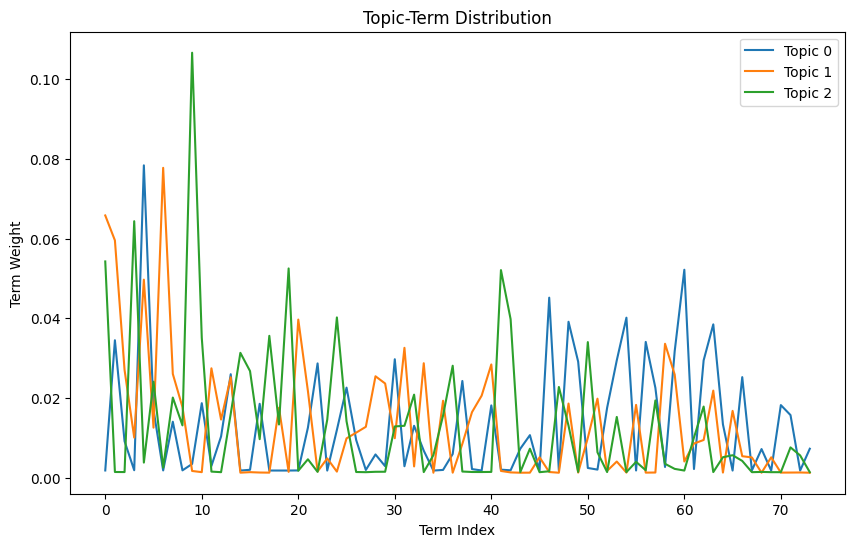

In [87]:
import matplotlib.pyplot as plt

# Extract topic-term distribution from the LDA model
topic_term_dists = lda_model.get_topics()

# Visualize the topic-term distribution using Matplotlib
plt.figure(figsize=(10, 6))
for i, topic in enumerate(topic_term_dists):
    plt.plot(topic, label=f'Topic {i}')
plt.xlabel('Term Index')
plt.ylabel('Term Weight')
plt.title('Topic-Term Distribution')
plt.legend()
plt.show()

# Train LDA model with fewer topics
lda_model_fewer_topics = gensim.models.ldamodel.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Extract necessary data for visualization with fewer topics
topic_term_dists_fewer = lda_model_fewer_topics.get_topics()
doc_topic_dists_fewer = [lda_model_fewer_topics.get_document_topics(doc) for doc in corpus]

# Visualize the topics with fewer topics using Matplotlib
# (Follow similar steps as shown in Solution #1)

<font size="3"><b>LET'S DRAW WORDCLOUDS FOR THE 10 TOPICS</b></font>

Size of features array: 29


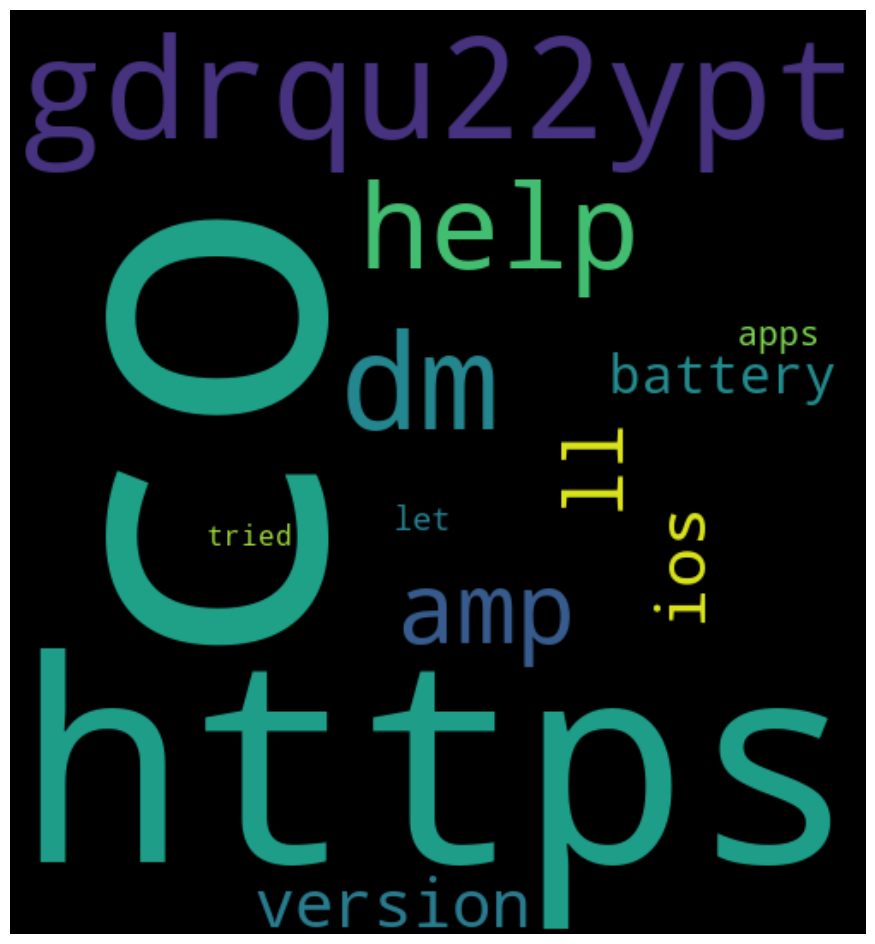

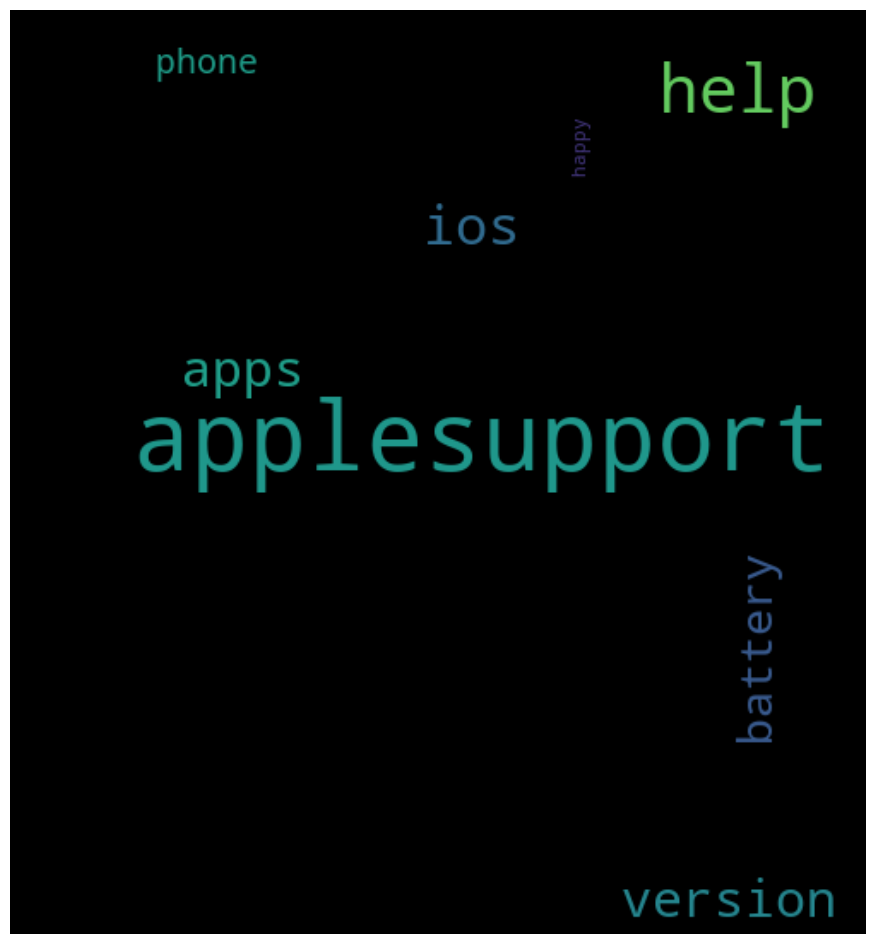

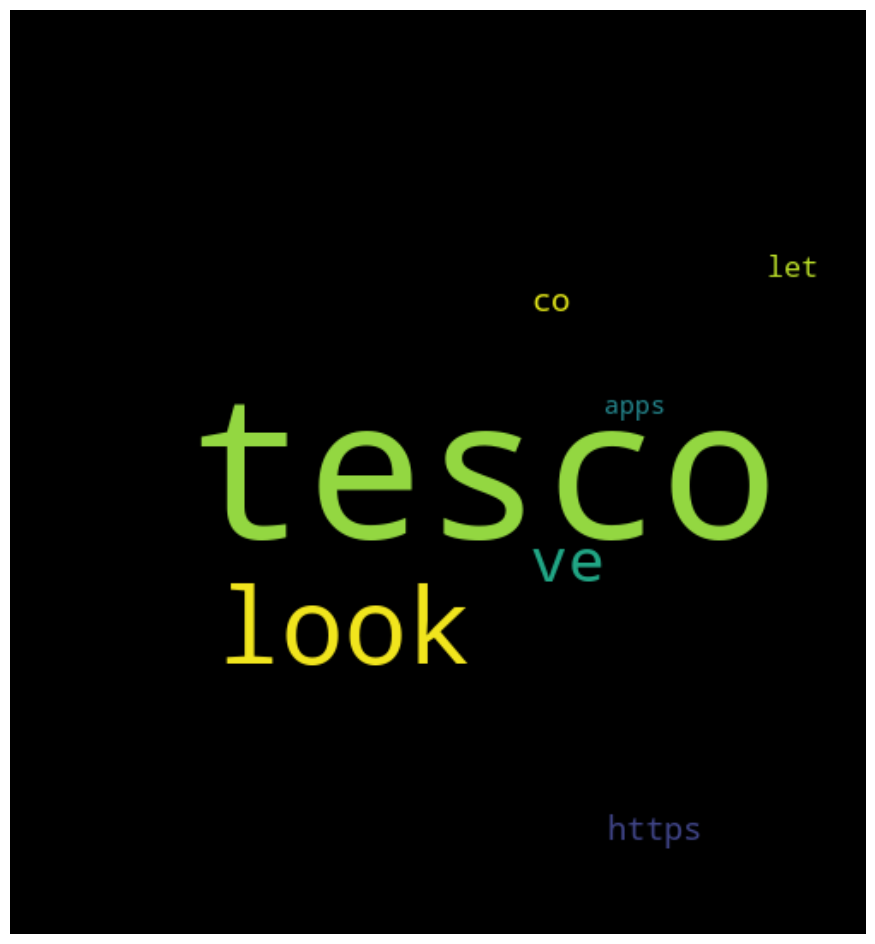

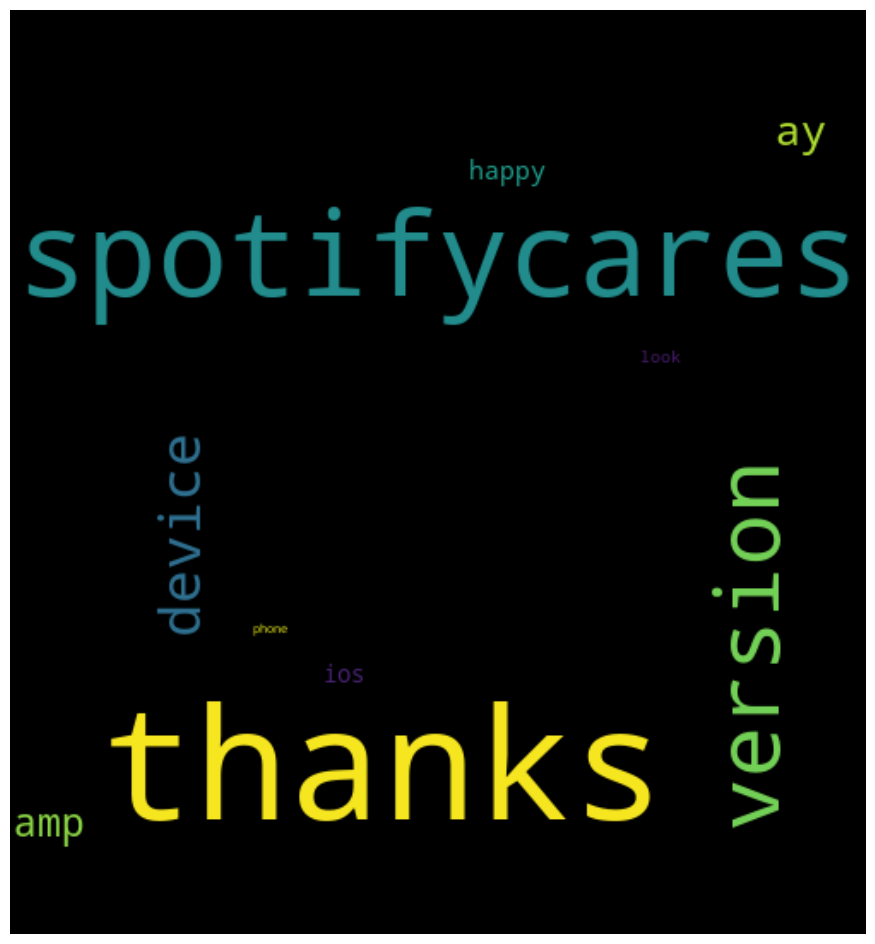

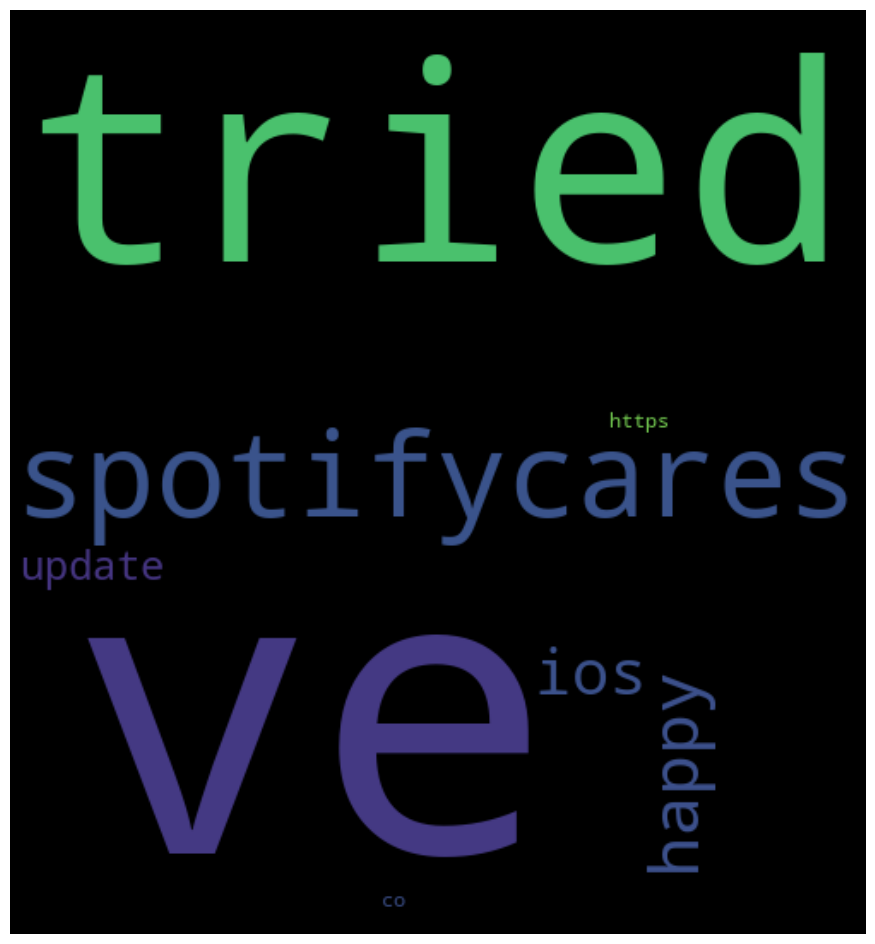

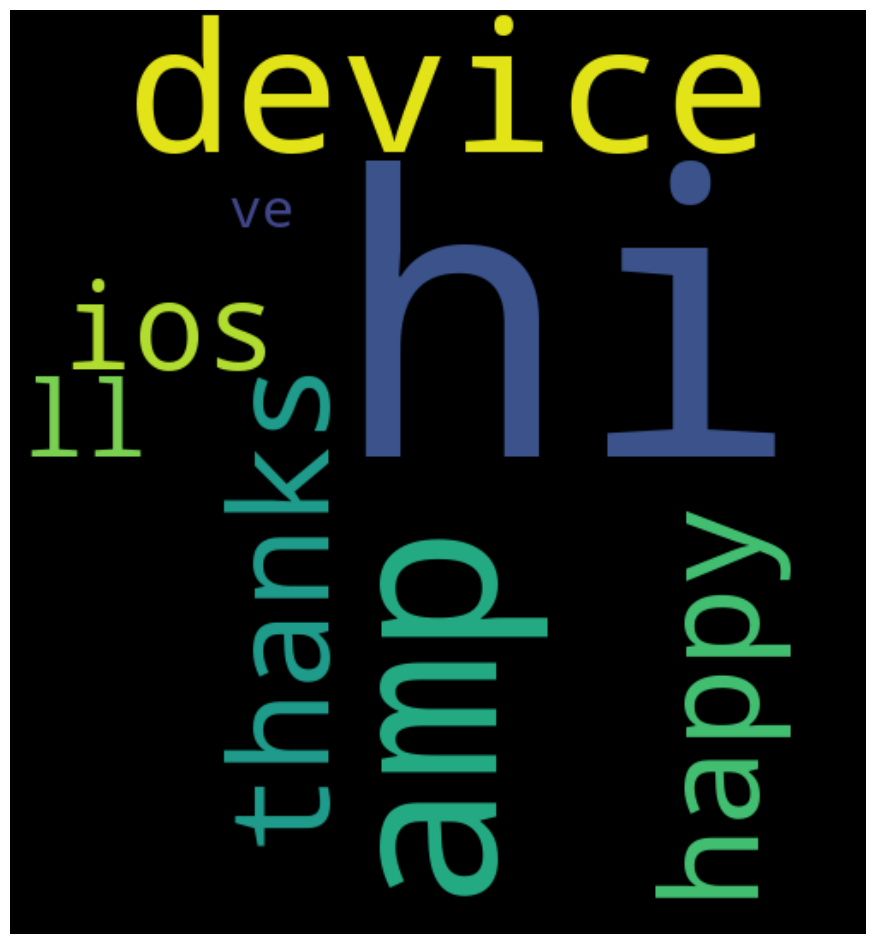

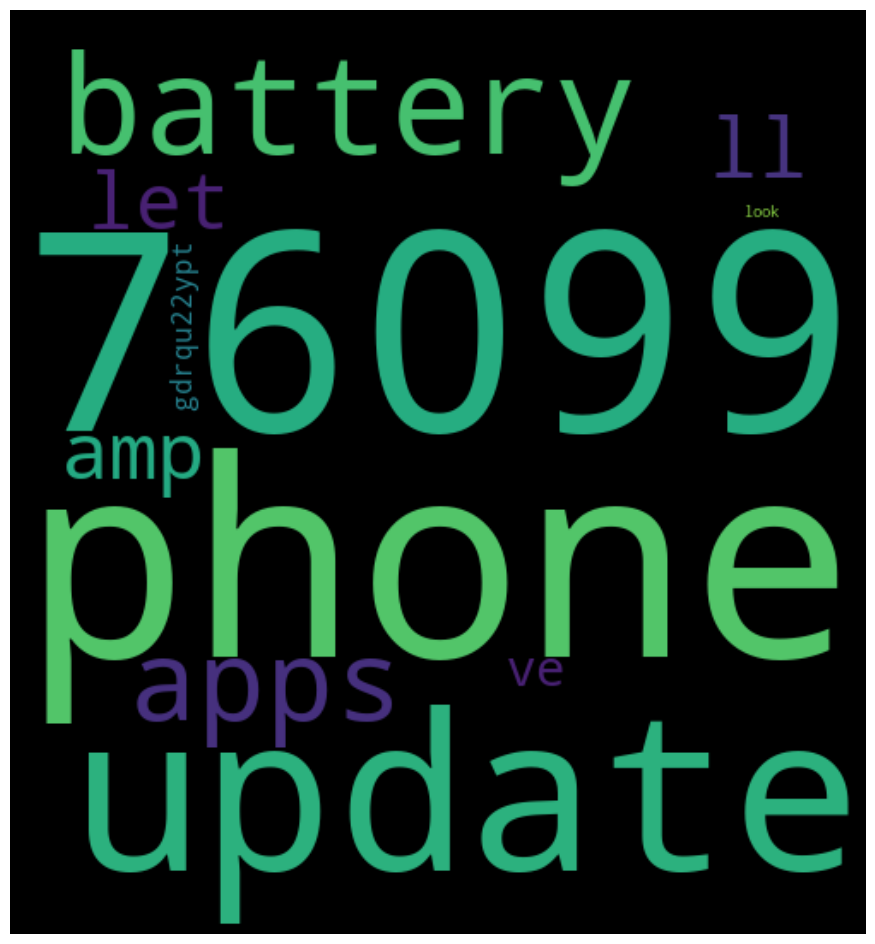

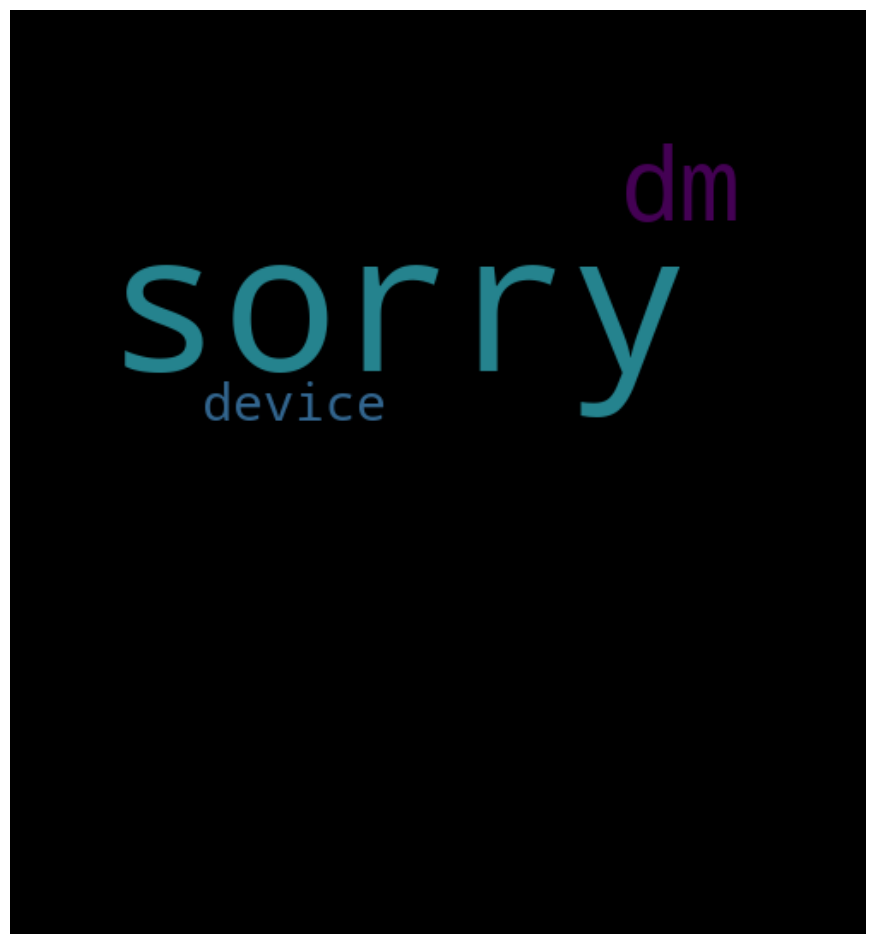

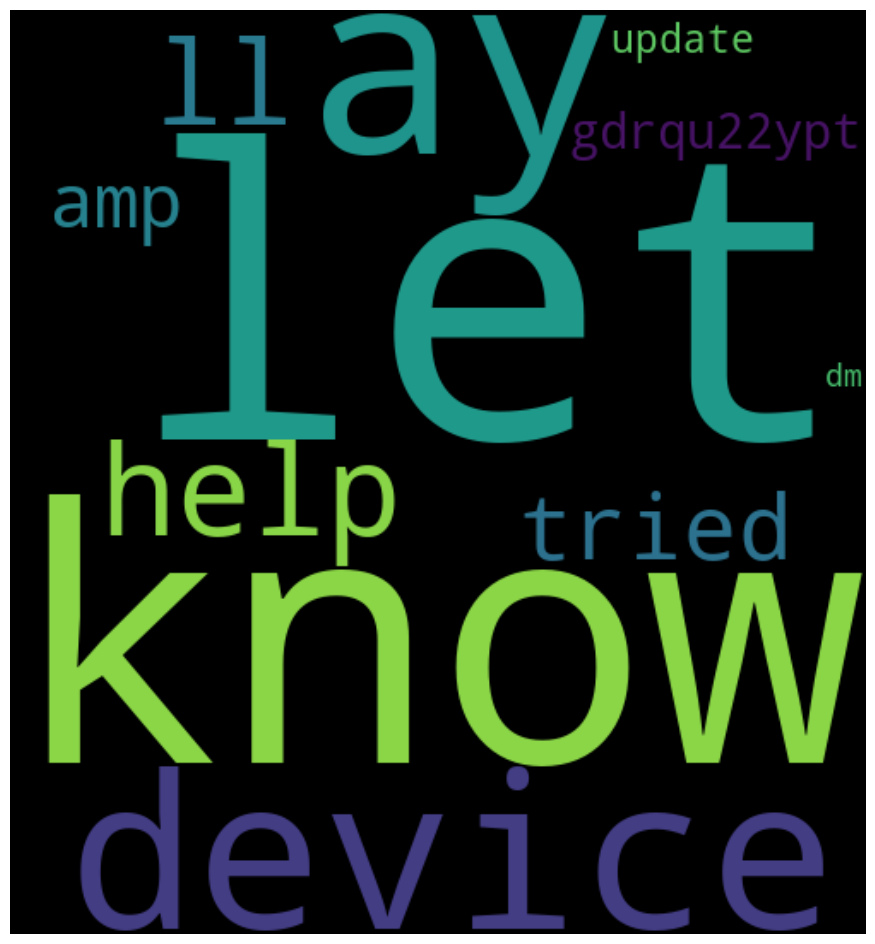

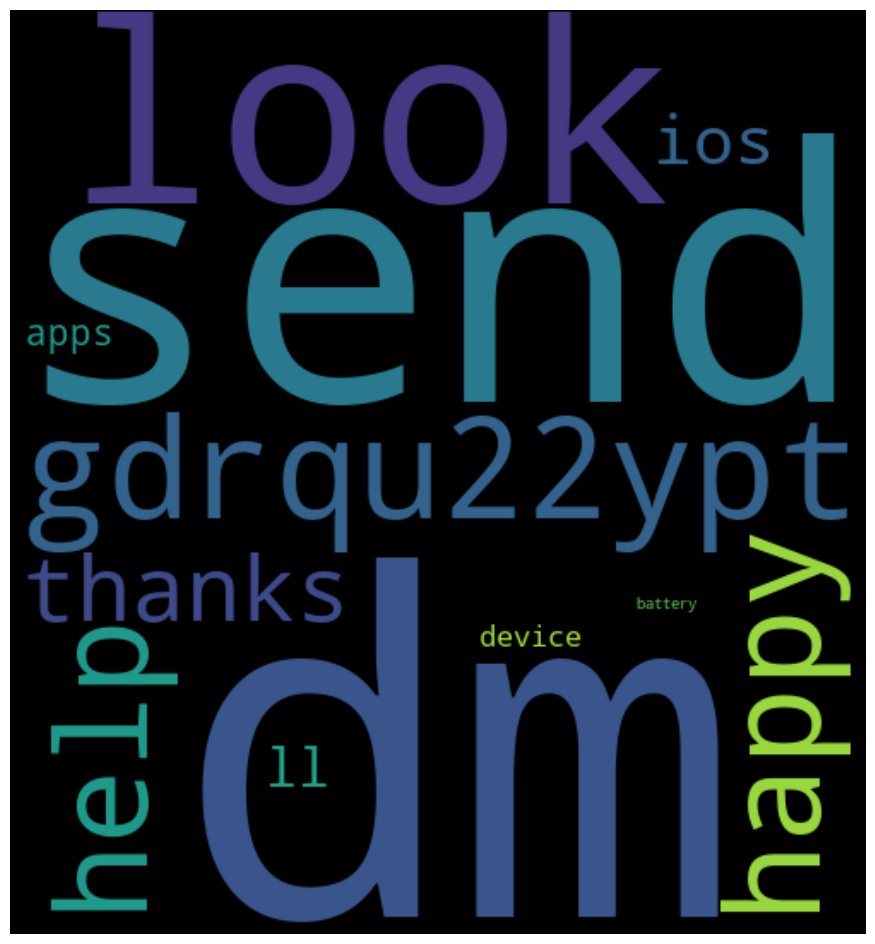

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML


display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])

        wc = WordCloud(background_color="black", max_words=200, width=500, height=540)
        wc.generate_from_frequencies(size)

        plt.figure(figsize=(12, 12))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")

        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')

# Assuming you have already trained an NMF or LDA model and have the features (terms)
# Replace the following with your actual model and features
# wordcloud_topics(your_model, your_features)
# Check the size of your features array
print("Size of features array:", len(count_para_vectorizer.get_feature_names_out()))

# Adjust your function call to ensure the no_top_words parameter is within bounds
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out(), no_top_words=29)



<font size="3"><b>THE LDA WORDCLOUDS</b></font>

Size of features array: 29


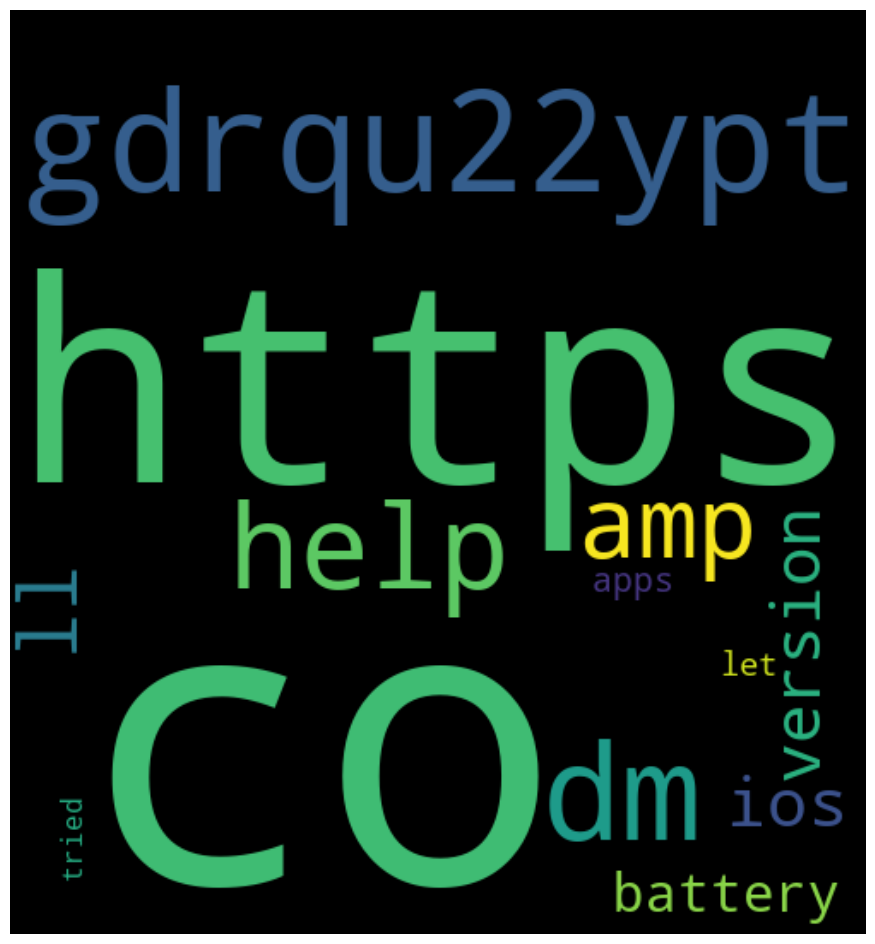

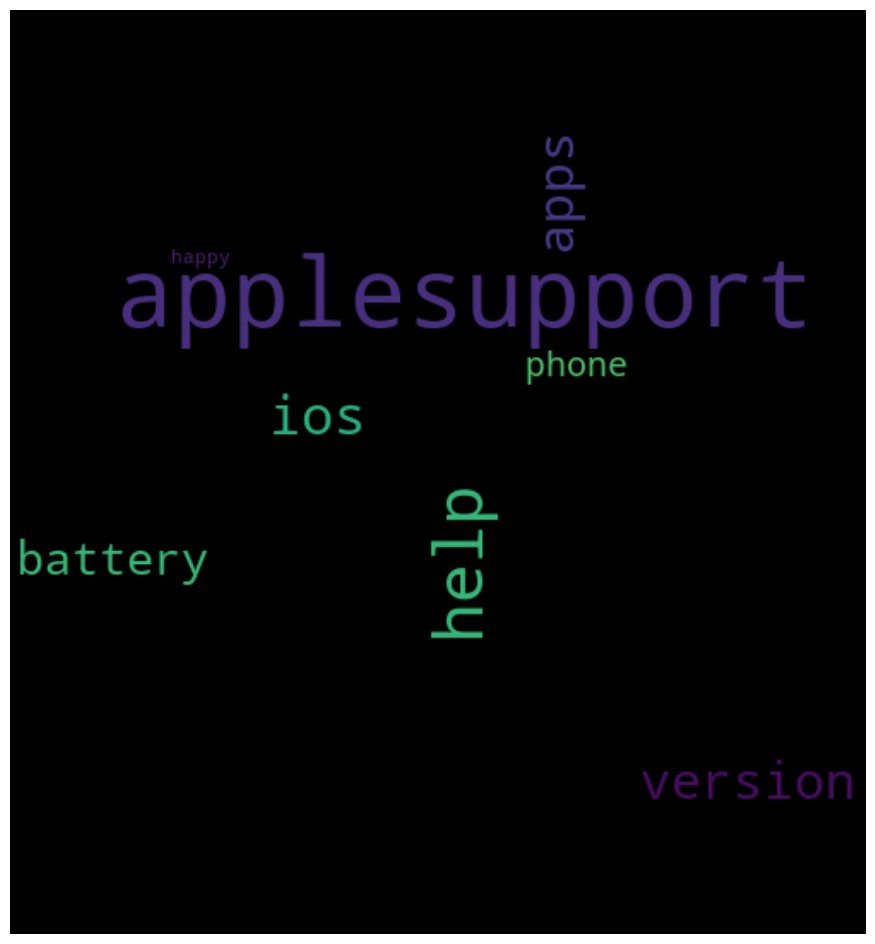

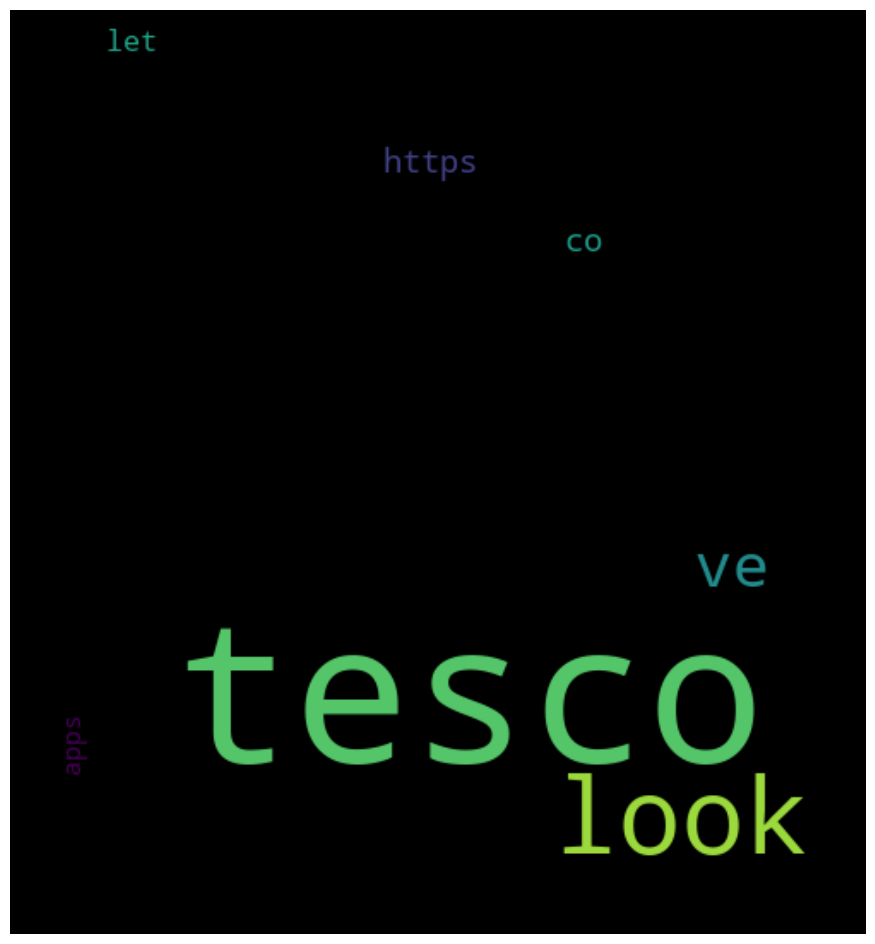

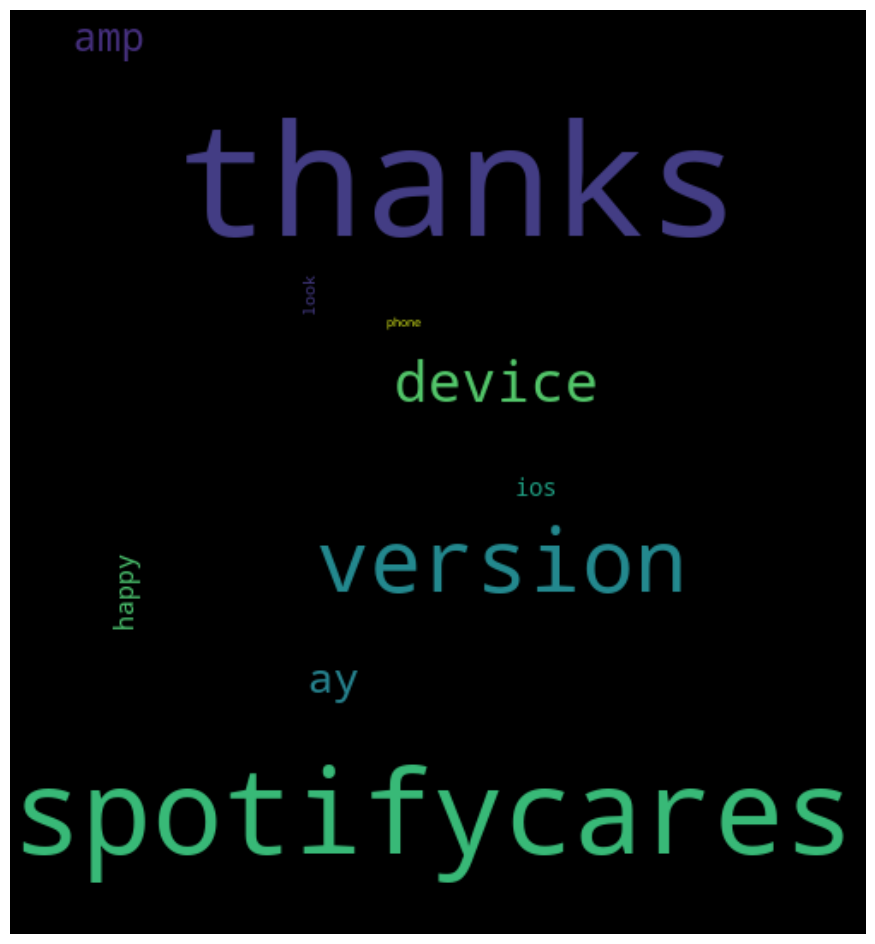

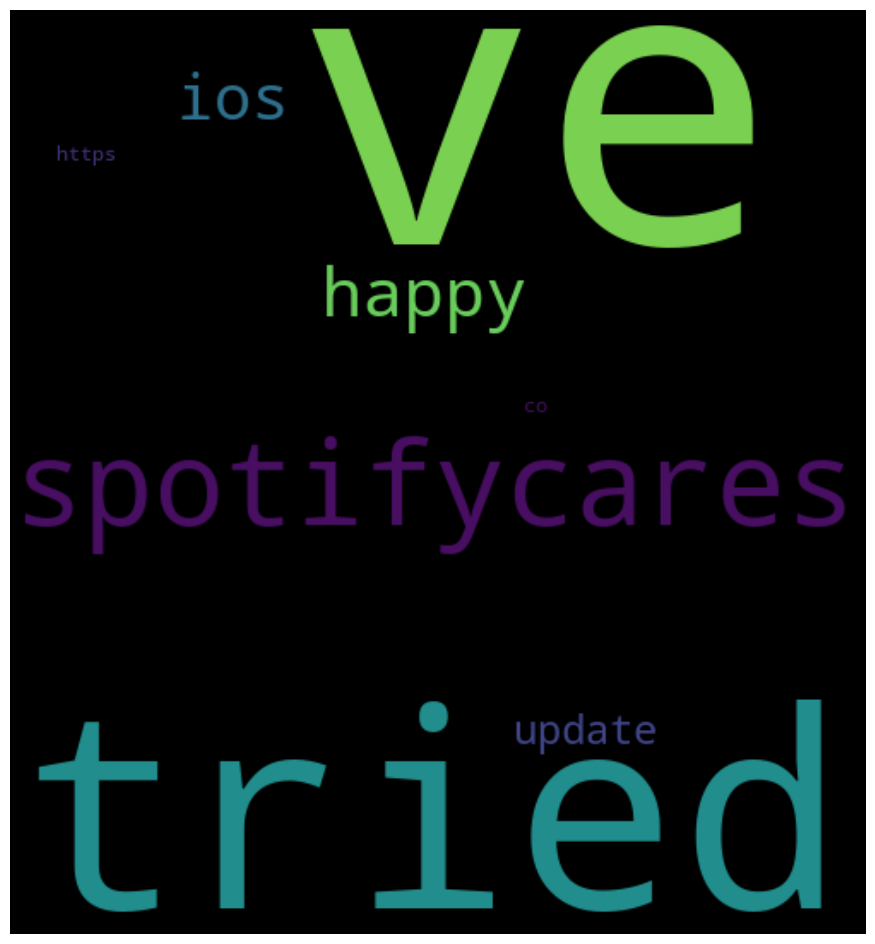

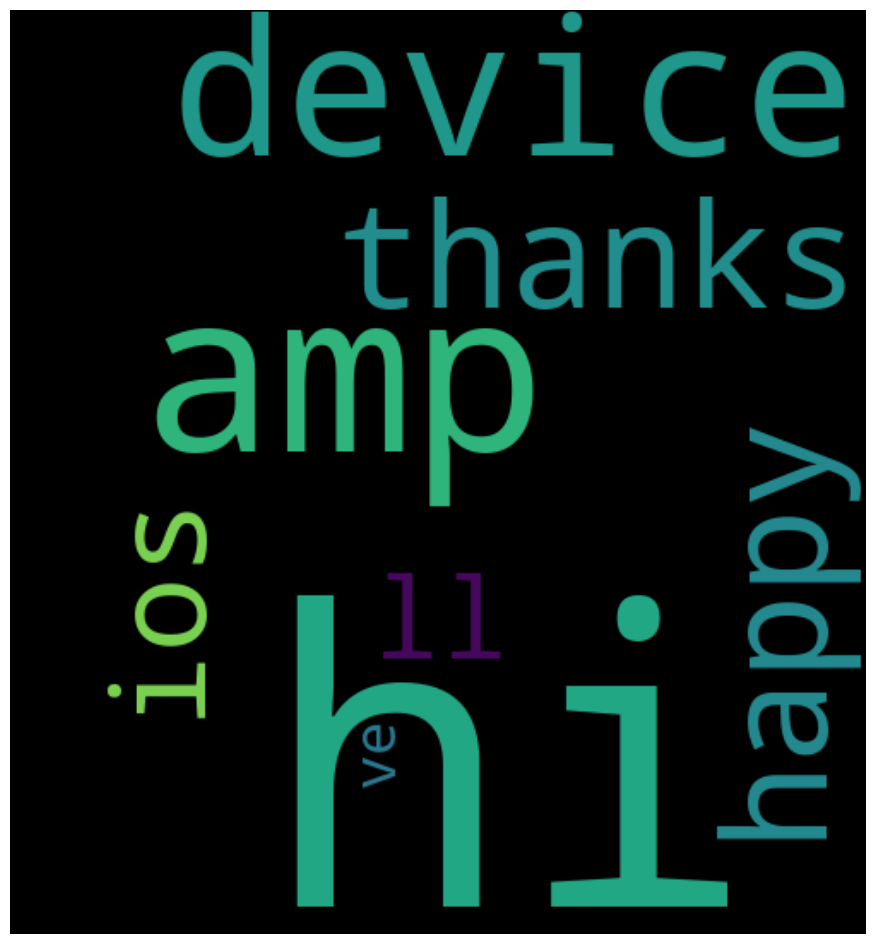

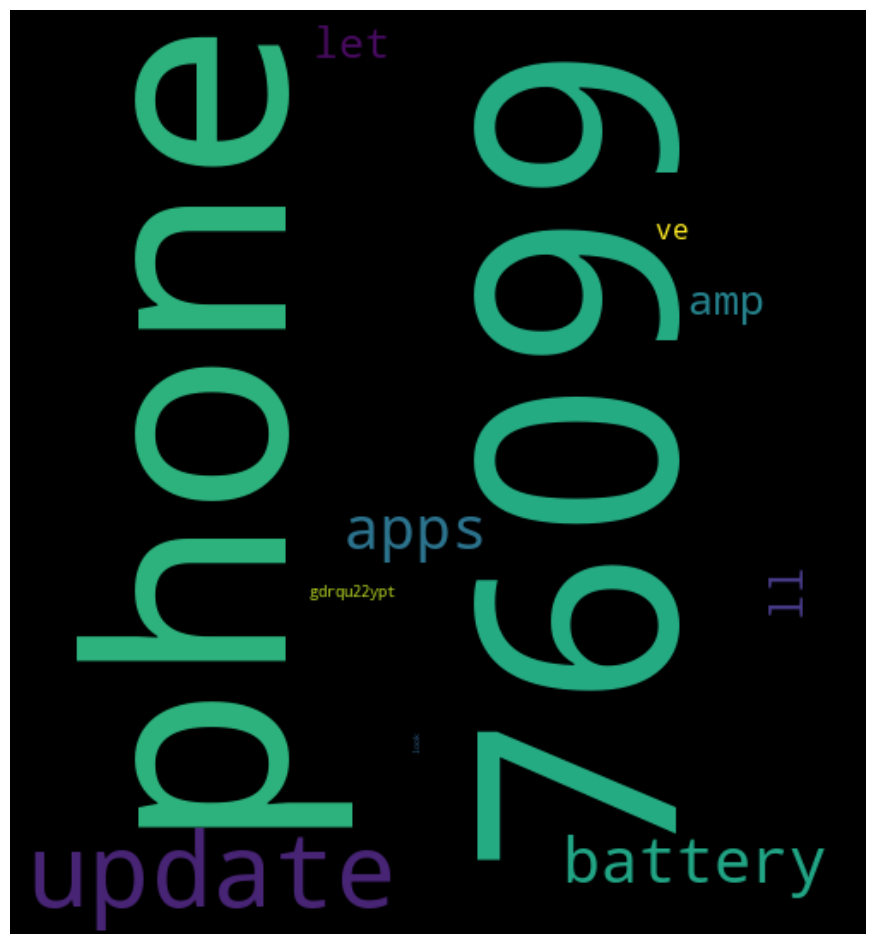

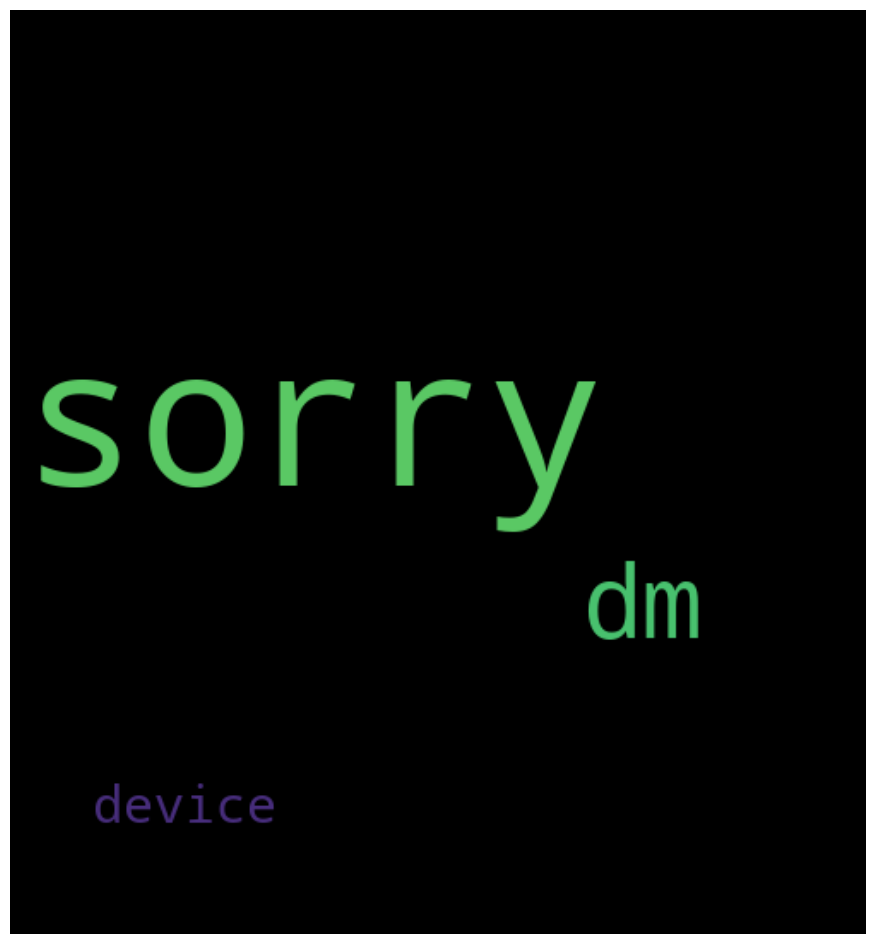

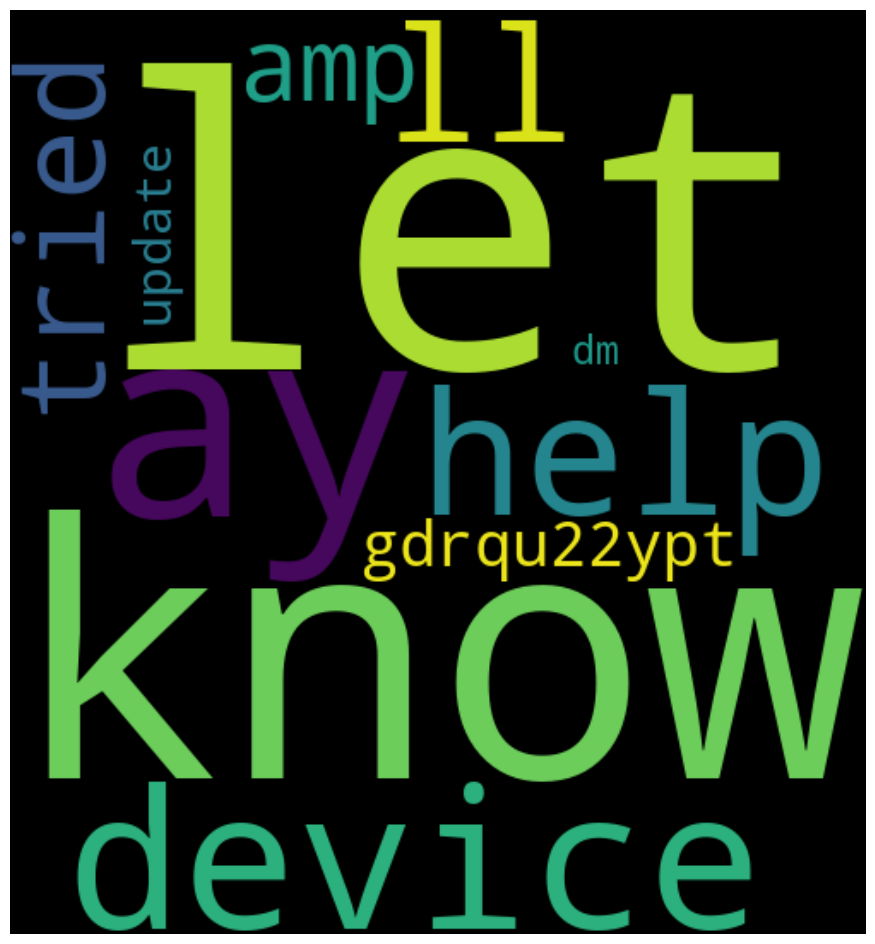

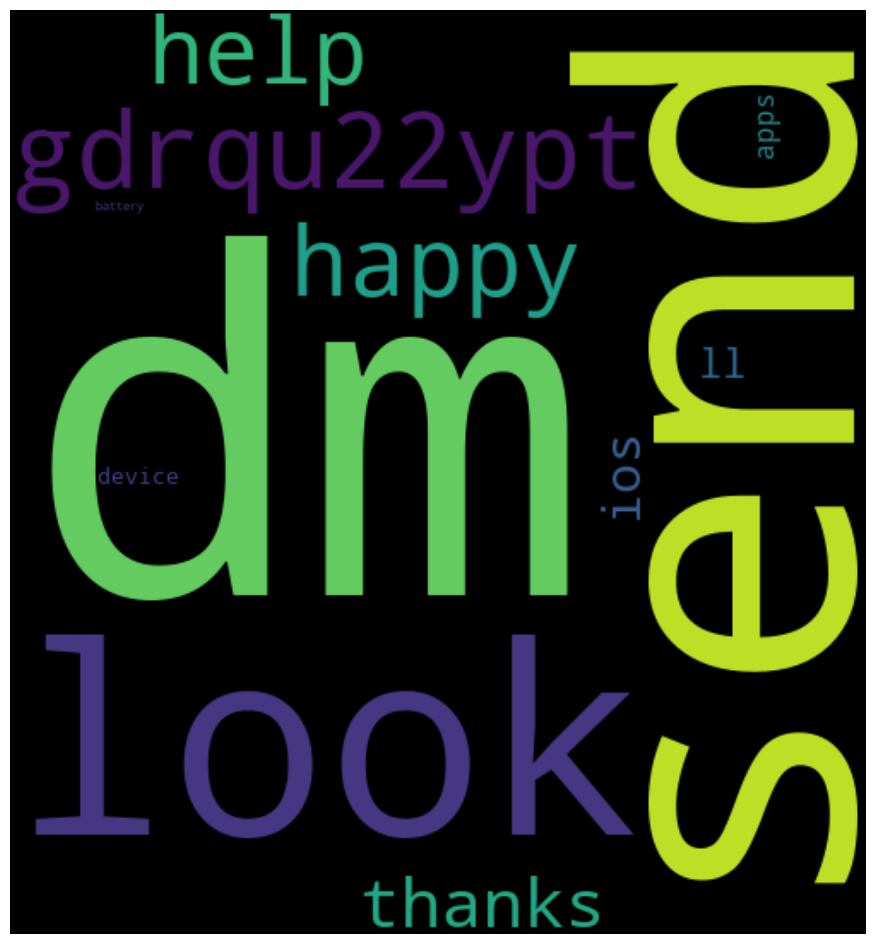

In [104]:
print("Size of features array:", len(count_para_vectorizer.get_feature_names_out()))

# Adjust your function call to ensure the no_top_words parameter is within bounds
wordcloud_topics(nmf_para_model, count_para_vectorizer.get_feature_names_out(), no_top_words=29)


<font size="3"><b>TOPIC NAMES BY JOINING THE TOP 2 WORDS</b></font>

In [105]:
topic_names = []
voc = count_para_vectorizer.get_feature_names_out()

print("Vocabulary:", voc)

for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

print("Topic Names:", topic_names)


Vocabulary: ['76099' 'amp' 'applesupport' 'apps' 'ay' 'battery' 'co' 'device' 'dm'
 'gdrqu22ypt' 'happy' 'help' 'hi' 'https' 'ios' 'know' 'let' 'll' 'look'
 'phone' 'send' 'sorry' 'spotifycares' 'tesco' 'thanks' 'tried' 'update'
 've' 'version']
Topic Names: ['Topic co https', 'Topic applesupport help', 'Topic tesco look', 'Topic thanks spotifycares', 'Topic ve tried', 'Topic hi amp', 'Topic 76099 phone', 'Topic sorry dm', 'Topic let know', 'Topic dm send']


<font size="3"><b>SEPARATE DATA BY YEAR</b></font>

In [107]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["tweet_id"]))):
    W_year = nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["tweet_id"] == year)])
    year_data.append([year] + list(W_year.sum(axis=0)/W_year.sum()*100.0))



100%|████████████████████████████████████████████████████████████████████████████████| 93/93 [00:00<00:00, 1368.79it/s]


<Axes: xlabel='tweet_id'>

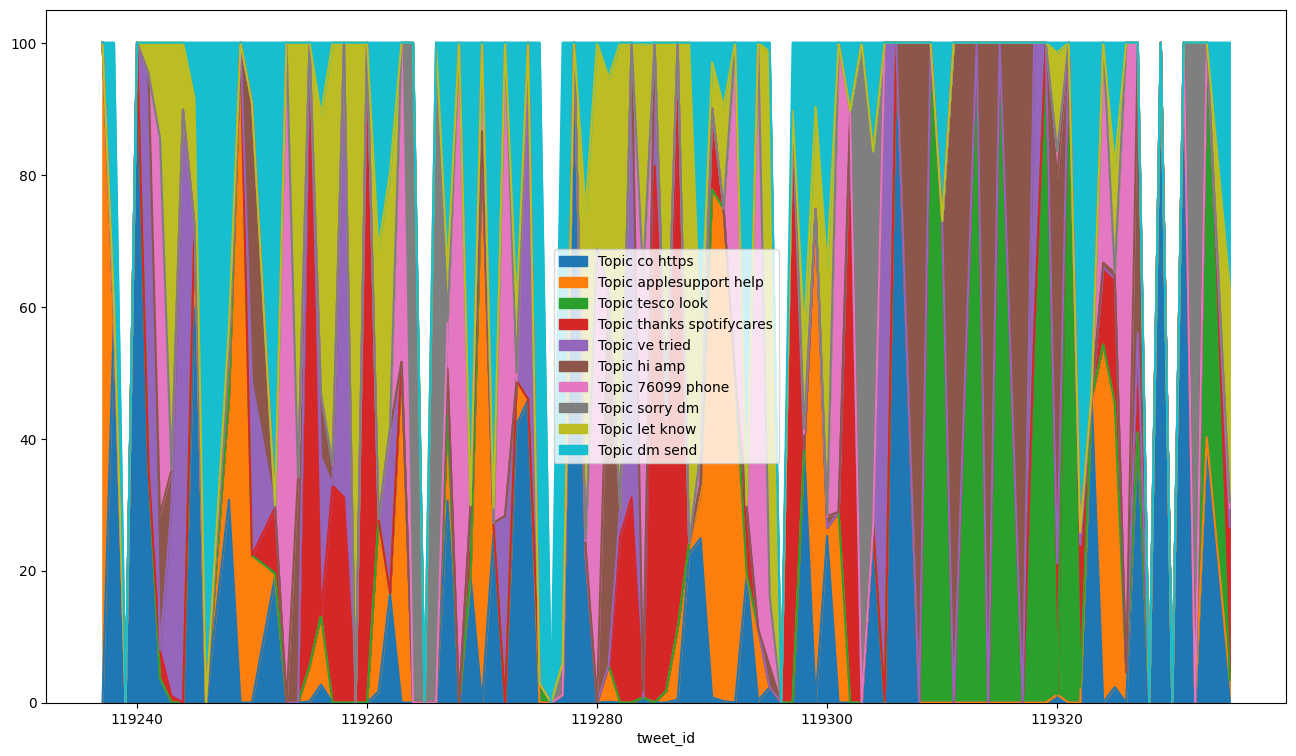

In [111]:
import matplotlib.pyplot as plt
df_year = pd.DataFrame(year_data, columns=["tweet_id"] + topic_names).set_index("tweet_id")
df_year.plot.area(figsize=(16,9))
